# Correlations and linear models
A linear model estimate a response from the linear combination of one or more inputs

$y \approx x_1 \alpha_1 + y_2 \alpha_2 + ... + y_n \alpha_n$

$y \approx \vec{x} \cdot \vec{\alpha}$

given an estimation $\hat{y} = \vec{x} \cdot \vec{\alpha}$

we look for the best $\vec{\alpha}$ which minimize all residuals $\epsilon(\hat{y}) = y - \hat{y}$

In [3]:
import pandas as pd

This dataset collects the yearly water and energy consuption estimation per capita in Milan collected by the italian government

Data is grouped by 

- water consumption
- methan consumption
- electricity consumption

In [4]:
cons = pd.read_csv("ds523_consumoacquaenergia.csv",sep=";")

In [5]:
cons.describe(include="all")

,anno,Consumo pro capite tipo,Consumo pro capite
count,36.00000,36,36.000000
unique,NaN,3,NaN
top,NaN,Energia elettrica per uso domestico,NaN
freq,NaN,12,NaN
mean,2005.50000,NaN,573.072222
std,3.50102,NaN,471.777743
min,2000.00000,NaN,80.400000
25%,2002.75000,NaN,89.625000
50%,2005.50000,NaN,432.900000
75%,2008.25000,NaN,1195.650000


In [6]:
cons["Consumo pro capite tipo"].unique()

array(['Energia elettrica per uso domestico',
       'Gas metano per uso domestico e riscaldamento',
       'Acqua fatturata per uso domestico'], dtype=object)

In [15]:
translate = {
    'Energia elettrica per uso domestico':'electricity',
    'Gas metano per uso domestico e riscaldamento':'methan',
    'Acqua fatturata per uso domestico':'water'
}
cons["type"] = cons["Consumo pro capite tipo"].map(translate)

In [22]:
cons2 = cons.pivot(index="anno",columns="type",values="Consumo pro capite").reset_index()
cons2 = cons2.rename({"anno":"year"}, axis="columns")
cons2

type,year,electricity,methan,water
0,2000,1130.2,509.0,92.1
1,2001,1143.9,500.7,91.3
2,2002,1195.5,504.2,90.4
3,2003,1222.8,480.2,87.3
4,2004,1228.6,442.4,80.4
5,2005,1225.0,434.5,81.3
6,2006,1219.7,431.3,82.2
7,2007,1197.0,381.1,81.6
8,2008,1203.0,384.9,84.5
9,2009,1202.9,389.6,85.8


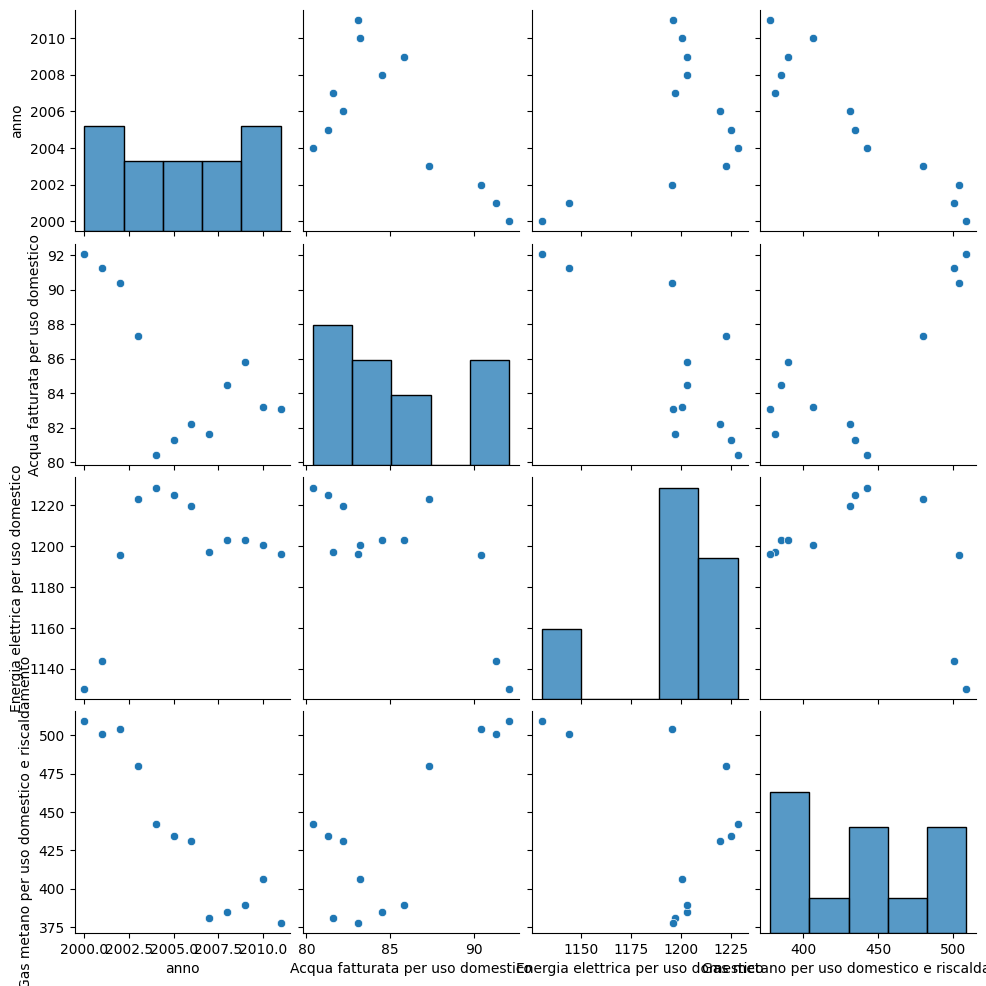

In [8]:
import seaborn as sns
sns.pairplot(consumo2)

<Axes: xlabel='anno', ylabel='Gas metano per uso domestico e riscaldamento'>

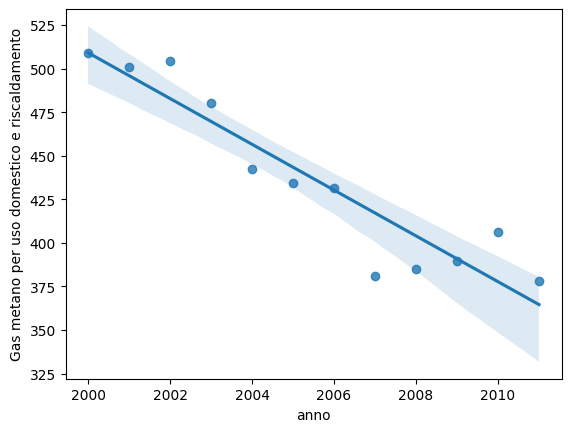

In [11]:
sns.regplot(consumo2,x="anno",y="Gas metano per uso domestico e riscaldamento")